In [2]:
# outcomes of the flippings
outcome <- c("T", "T", "T", "T", "T", "H", "T", "T", "H", "H", "T", "T", "H", "H", "H", "T", "H", "T", "H", "T", "H", "H", "T", "H", "T", "H", "T", "H", "H", "H")
for(i in 1:length(outcome)){
    outcome[i] <- ifelse(outcome[i] == "T", 1, 0)
}

outcome <- as.numeric(outcome)
str(outcome)

 num [1:30] 1 1 1 1 1 0 1 1 0 0 ...


In [3]:
n <- 30
y <- sum(outcome)     # outcome is H
n.sample <- 1000
p <- seq(1 / n.sample, 1, 1 / n.sample)

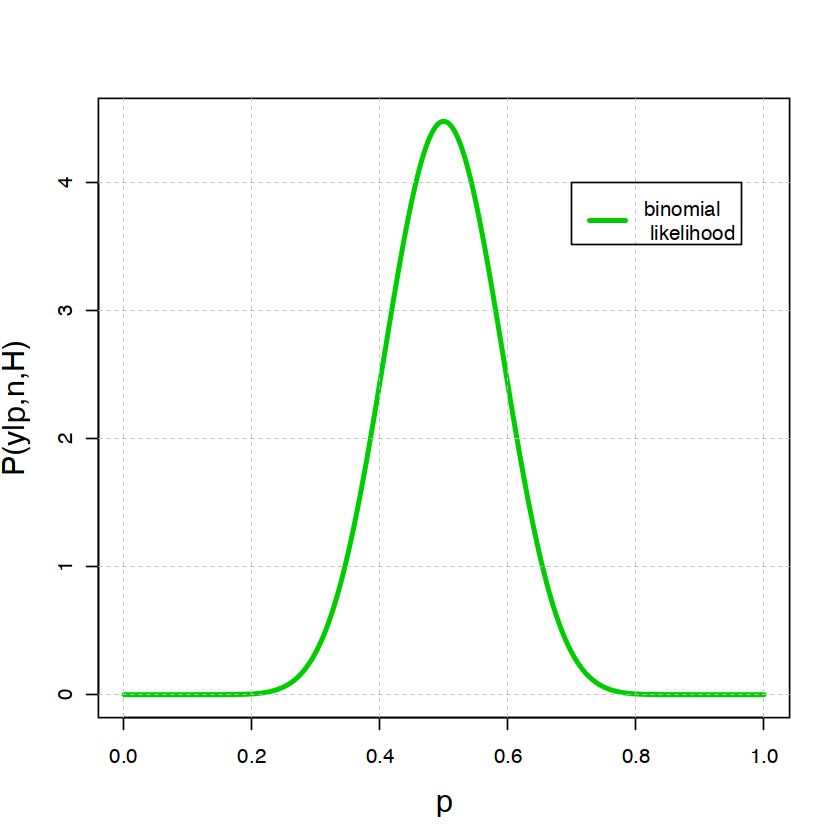

In [5]:
# BINOMIAL LIKELIHOOD
likelihood.star <- dbinom(y, n, p)    # not normalized
likelihood <- likelihood.star / (sum(likelihood.star) / n.sample)

plot(p, likelihood, type = "l", col = "green3", lwd = 3, cex.lab = 1.5, xlab = "p", ylab = "P(y|p,n,H)")
grid(nx = NULL, ny = NULL, lty = 2, col = "gray", lwd = 0.5)
legend(0.7, 4, legend = "binomial \n likelihood", col = "green3", lty = 1,, lwd = 3, cex = 1)

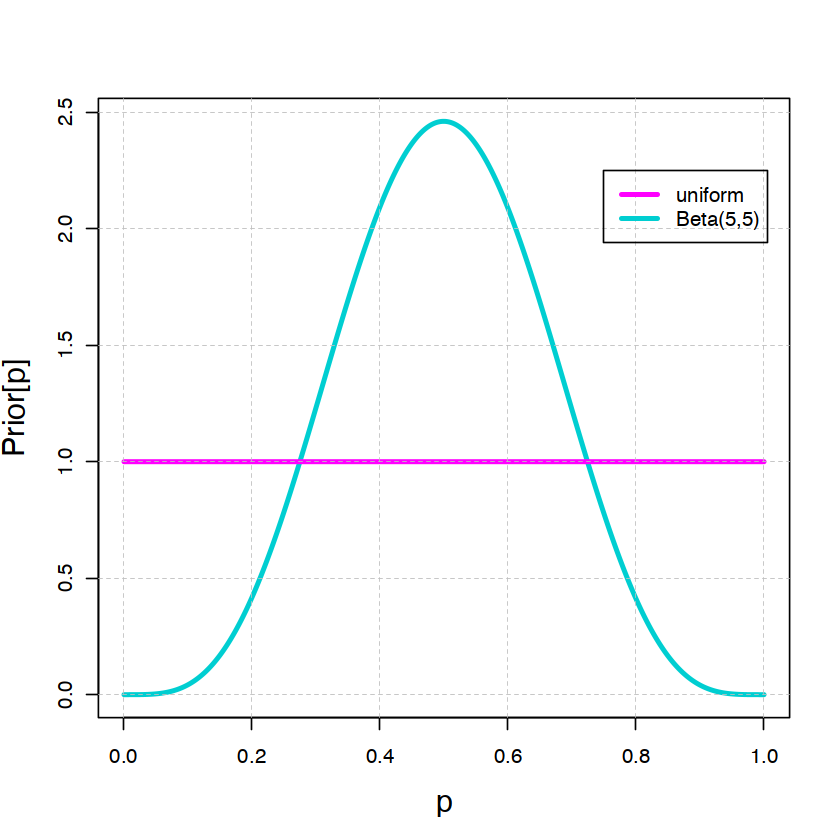

In [6]:
# PRIORS
# uniform
unif_prior <- rep(1, length(p))

# beta
alpha <- 5
beta <- 5
beta_prior <- dbeta(p, alpha, beta)

# plot
plot(p, beta_prior, type = "l", col = "dark turquoise", lwd = 3, cex.lab = 1.5, xlab = "p", ylab = "Prior[p]")
lines(p, unif_prior, type = "l", col = "magenta", lwd = 3, cex.lab = 1.5, xlab = "p", ylab = "Prior[p]")

grid(nx = NULL, ny = NULL, lty = 2, col = "gray", lwd = 0.5)
legend(0.75, 2.25, legend = c("uniform", "Beta(5,5)"), col = c("magenta", "dark turquoise"), lty = 1,, lwd = 3, cex = 1)

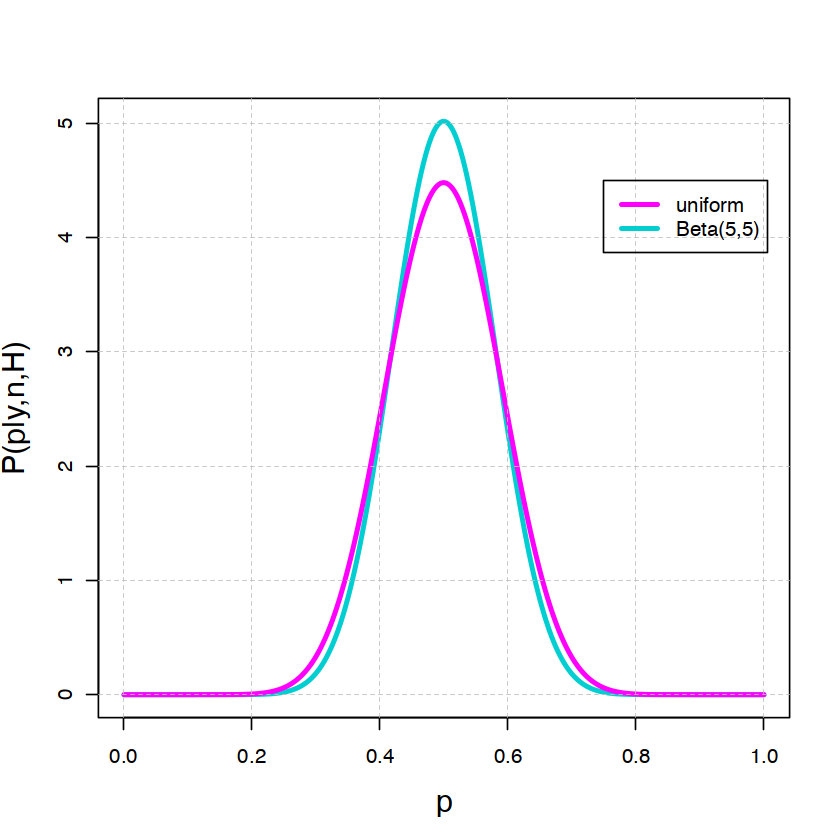

In [7]:
# POSTERIORS
# uniform
unif_posterior.star <- dbinom(y, n, p) * unif_prior   # un-normalized posterior
unif_posterior <- unif_posterior.star / (sum(unif_posterior.star) / n.sample)

# beta
beta_posterior.star <- dbinom(y, n, p) * beta_prior   # un-normalized posterior
beta_posterior <- beta_posterior.star / (sum(beta_posterior.star) / n.sample)

# plots
plot(p, beta_posterior, type = "l", col = "dark turquoise", lwd = 3, cex.lab = 1.5, xlab = "p", ylab = "P(p|y,n,H)")
lines(p, unif_posterior, type = "l", col = "magenta", lwd = 3, cex.lab = 1.5, xlab = "p", ylab = "P(p|y,n,H)")

grid(nx = NULL, ny = NULL, lty = 2, col = "gray", lwd = 0.5)
legend(0.75, 4.5, legend = c("uniform", "Beta(5,5)"), col = c("magenta", "dark turquoise"), lty = 1,, lwd = 3, cex = 1)

In [8]:
# MOST PROBABLE VALUE
cat(paste("The most probable value for the coin probability p is:", p[which.max(unif_posterior)], "using an uniform prior, and:", p[which.max(beta_posterior)], "using a Beta(5,5) prior", '\n'))

The most probable value for the coin probability p is: 0.5 using an uniform prior, and: 0.5 using a Beta(5,5) prior 


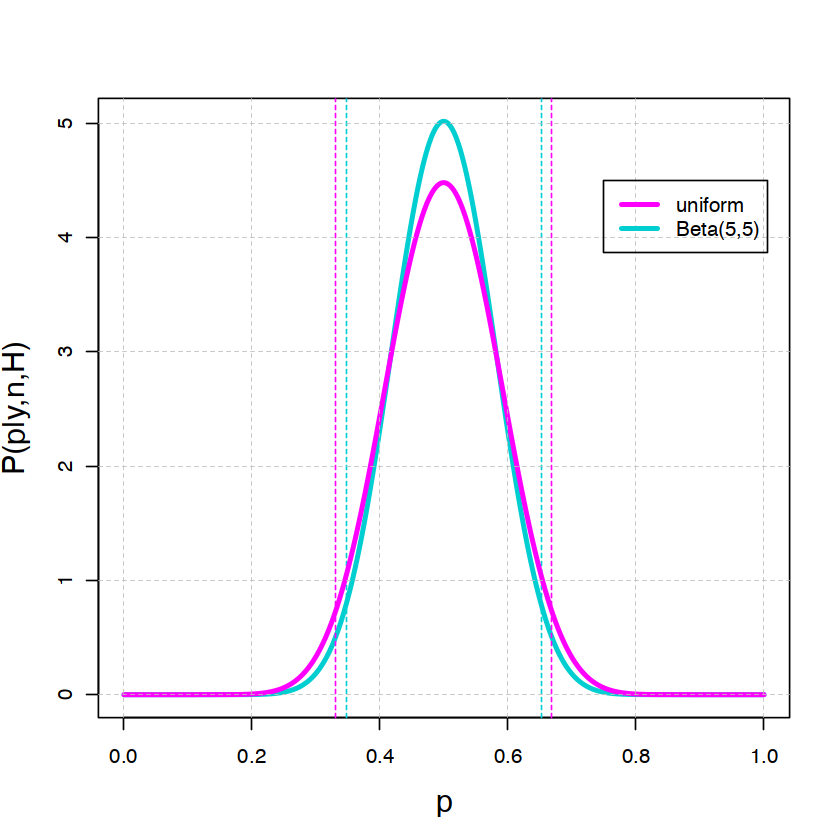

In [9]:
# CREDIBILITY INTERVAL
# functions to find the interval
ci_min <- function(f){
    integral <- sum(f)
    val <- 0
    for(i in 1:length(f)){
        val <- val + f[i]
        if(val > integral * 0.025){
            break
        }
    }
    return(i / 1000)
}

ci_max <- function(f){
    integral <- sum(f)
    val <- 0
    for(i in 1:length(f)){
        val <- val + f[i]
        if(val > integral * 0.975){
            break
        }
    }
    return(i / 1000)
}

# uniform
unif_min <- ci_min(unif_posterior)
unif_max <- ci_max(unif_posterior)

# beta
beta_min <- ci_min(beta_posterior)
beta_max <- ci_max(beta_posterior)

# plot
plot(p, beta_posterior, type = "l", col = "dark turquoise", lwd = 3, cex.lab = 1.5, xlab = "p", ylab = "P(p|y,n,H)")
abline(v = beta_min, lty = 2, lwd = 1, col = "dark turquoise")
abline(v = beta_max, lty = 2, lwd = 1, col = "dark turquoise")

lines(p, unif_posterior, type = "l", col = "magenta", lwd = 3, cex.lab = 1.5, xlab = "p", ylab = "P(p|y,n,H)")
abline(v = unif_min, lty = 2, lwd = 1, col = "magenta")
abline(v = unif_max, lty = 2, lwd = 1, col = "magenta")

grid(nx = NULL, ny = NULL, lty = 2, col = "gray", lwd = 0.5)
legend(0.75, 4.5, legend = c("uniform", "Beta(5,5)"), col = c("magenta", "dark turquoise"), lty = 1,, lwd = 3, cex = 1)

In [10]:
# summary table
prior_dist <- c("uniform","Beta(5,5)")
min_conf.int <- c(unif_min, beta_min)
max_conf.int <- c(unif_max, beta_max)

df_unif <- data.frame(prior_dist, min_ci = min_conf.int, max_ci = max_conf.int)
print(df_unif)

  prior_dist min_ci max_ci
1    uniform  0.331  0.669
2  Beta(5,5)  0.348  0.652


In [11]:
# SEQUENTIAL ANALYSIS
toss <- seq(1:n)

unif_most_prob <- rep(0, n)
seq_unif_min <- rep(0, n)
seq_unif_max <- rep(0, n)

beta_most_prob <- rep(0, n)
seq_beta_min <- rep(0, n)
seq_beta_max <- rep(0, n)

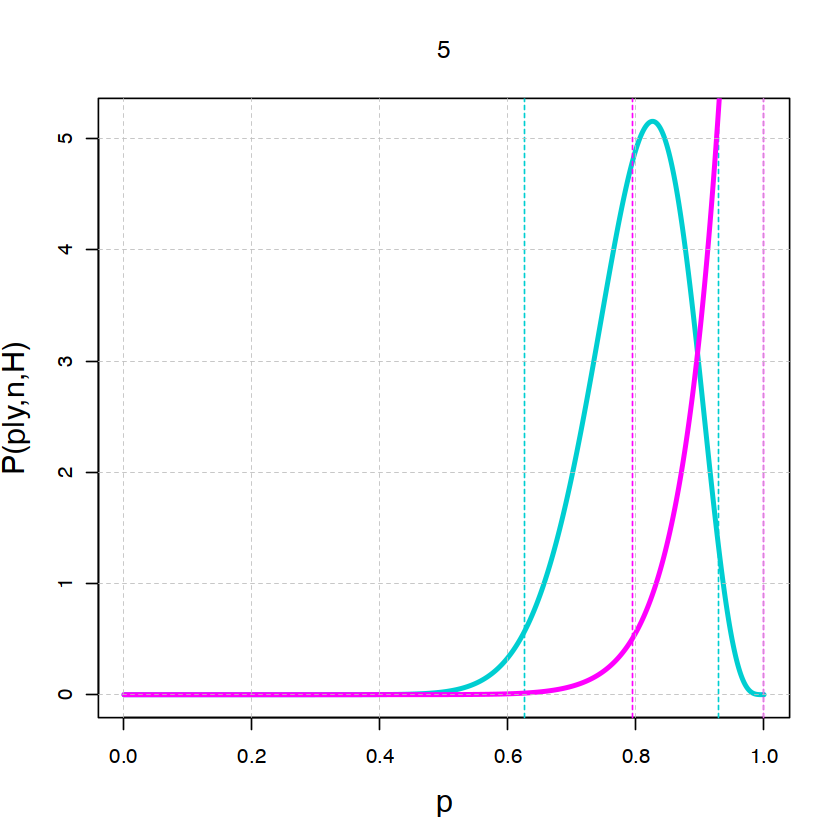

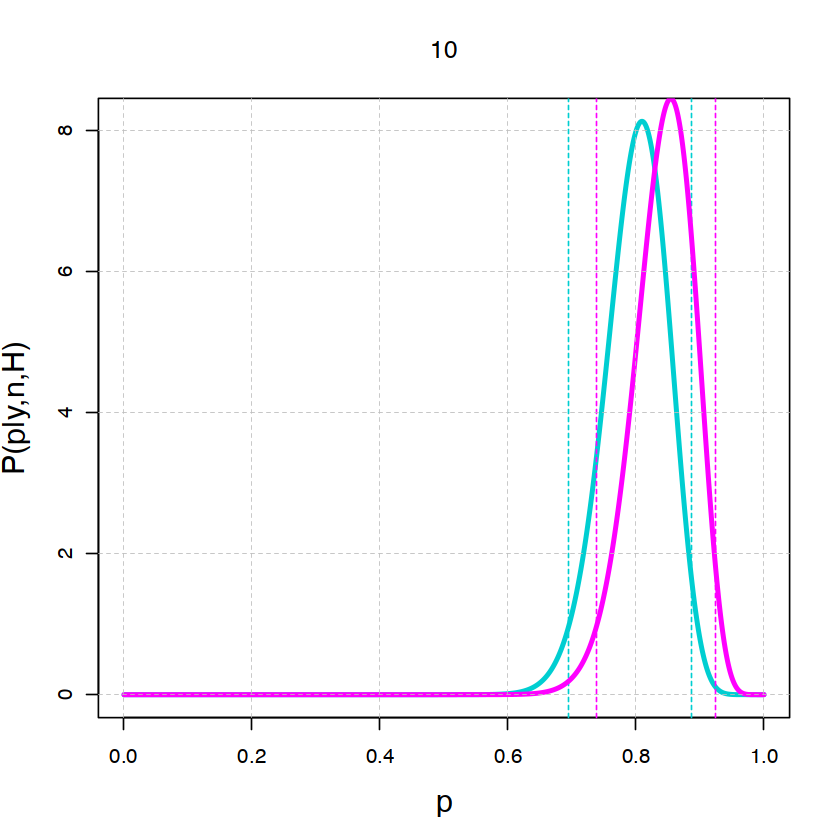

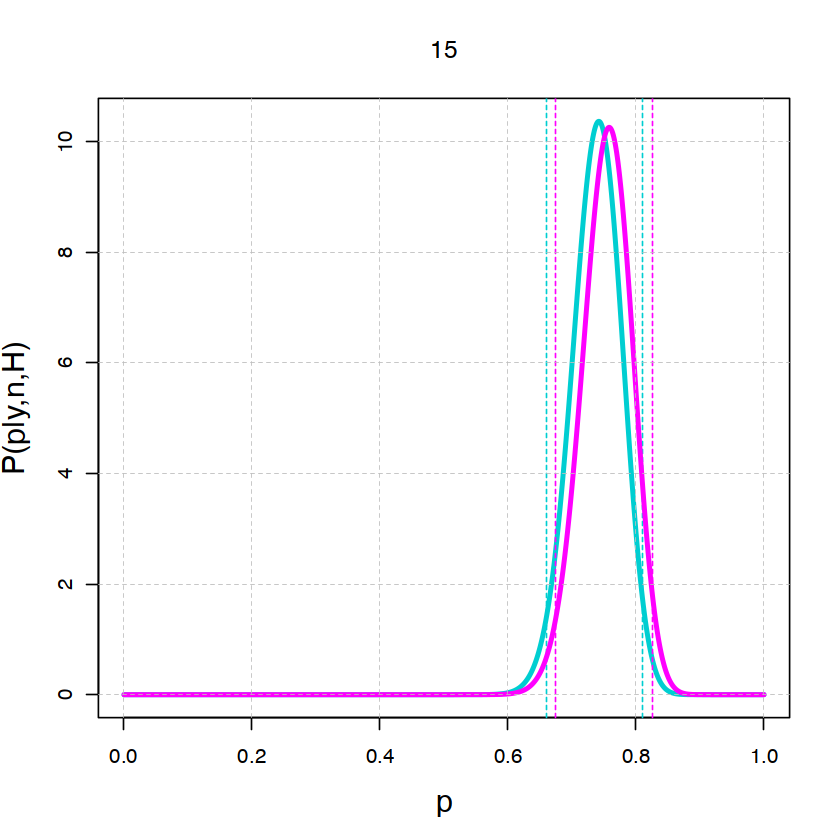

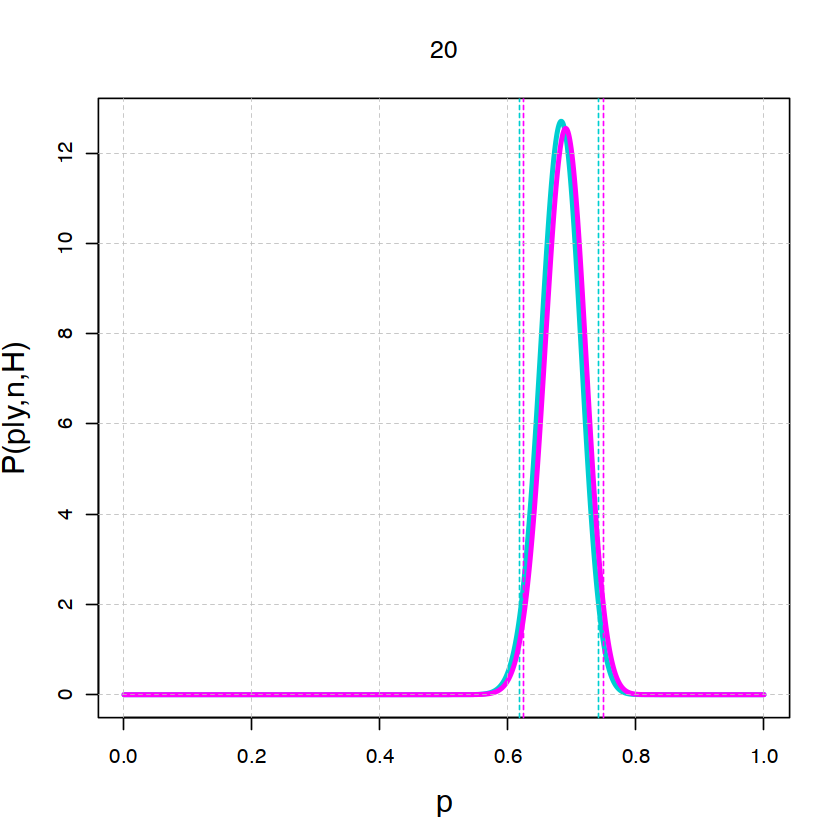

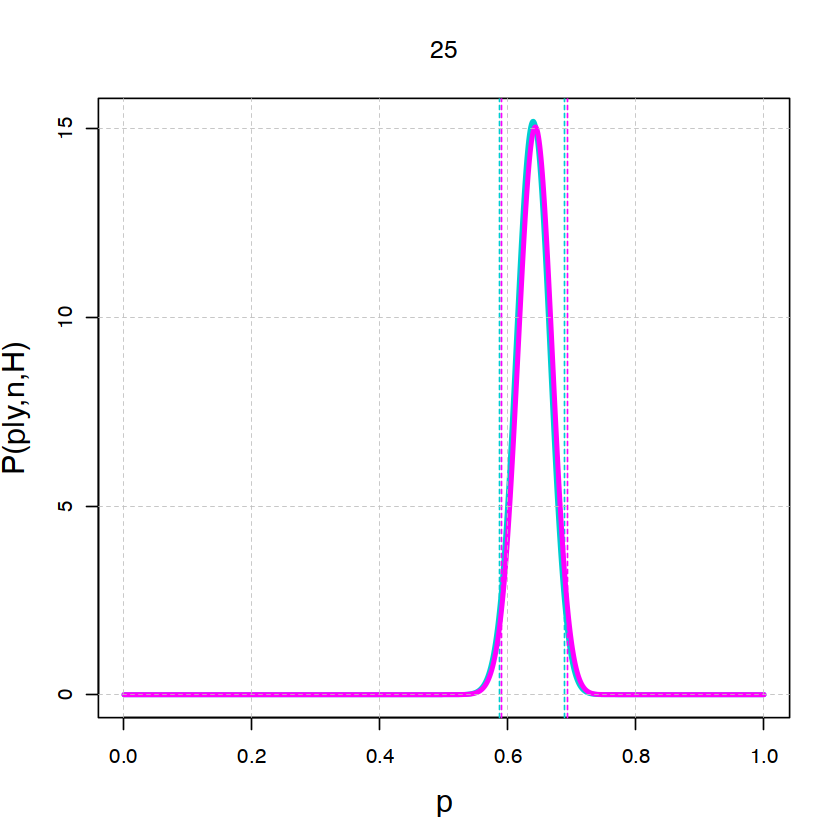

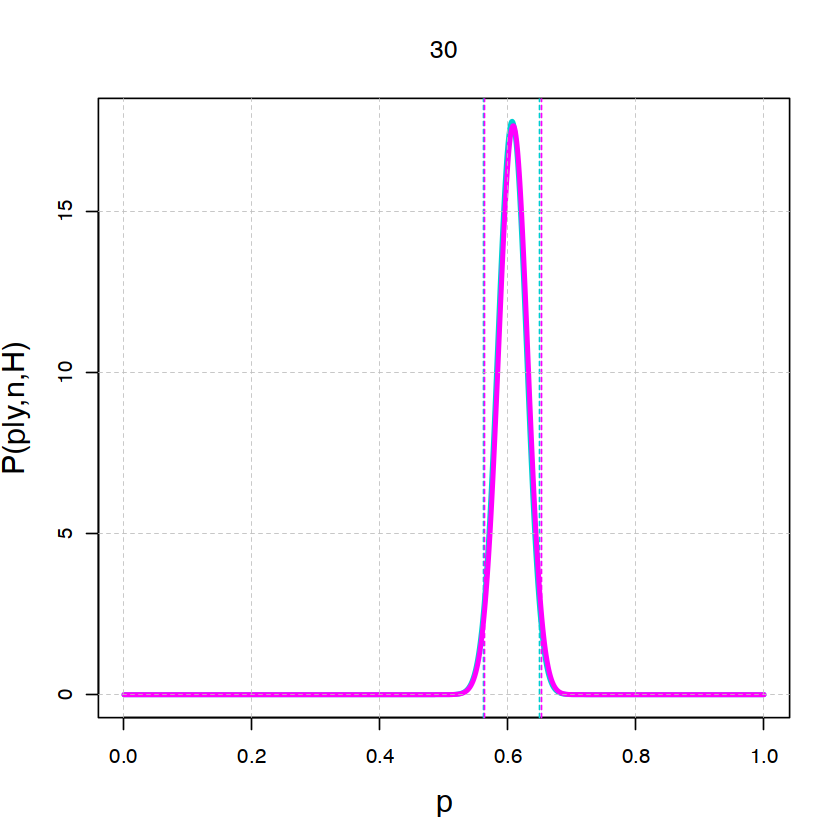

In [12]:
for(i in 1:n){
    seq_n <- i 
    seq_y <- 0
    for(j in 1:i){
        seq_y <- seq_y + outcome[j]
    }

    # uniform
    seq_unif_posterior.star <- dbinom(seq_y, seq_n, p) * unif_prior   # un-normalized posterior
    seq_unif_posterior <- seq_unif_posterior.star / (sum(seq_unif_posterior.star) / n.sample)

    unif_most_prob[i] <- p[which.max(seq_unif_posterior)]
    seq_unif_min[i] <- ci_min(seq_unif_posterior)
    seq_unif_max[i] <- ci_max(seq_unif_posterior)

    # beta
    seq_beta_posterior.star <- dbinom(seq_y, seq_n, p) * beta_prior   # un-normalized posterior
    seq_beta_posterior <- seq_beta_posterior.star / (sum(seq_beta_posterior.star) / n.sample)

    beta_most_prob[i] <- p[which.max(seq_beta_posterior)]
    seq_beta_min[i] <- ci_min(seq_beta_posterior)
    seq_beta_max[i] <- ci_max(seq_beta_posterior)

    # plot
    if(i %% 5 == 0){
        plot(p, seq_beta_posterior, type = "l", col = "dark turquoise", lwd = 3, cex.lab = 1.5, xlab = "p", ylab = "P(p|y,n,H)", main = i)
        abline(v = seq_beta_min[i], lty = 2, lwd = 1, col = "dark turquoise")
        abline(v = seq_beta_max[i], lty = 2, lwd = 1, col = "dark turquoise")

        lines(p, seq_unif_posterior, type = "l", col = "magenta", lwd = 3, cex.lab = 1.5, xlab = "p", ylab = "P(p|y,n,H)")
        abline(v = seq_unif_min[i], lty = 2, lwd = 1, col = "magenta")
        abline(v = seq_unif_max[i], lty = 2, lwd = 1, col = "magenta")

        grid(nx = NULL, ny = NULL, lty = 2, col = "gray", lwd = 0.5)
    }

    # posterior becomes the prior
    unif_prior <- seq_unif_posterior
    beta_prior <- seq_beta_posterior
}

In [13]:
# summary table
unif_df <- data.frame(toss, most_probable = unif_most_prob, min = seq_unif_min, max = seq_unif_max)
beta_df <- data.frame(toss, most_probable = beta_most_prob, min = seq_beta_min, max = seq_beta_max)

print(unif_df)
print(beta_df)

   toss most_probable   min   max
1     1         1.000 0.158 0.988
2     2         1.000 0.398 0.994
3     3         1.000 0.591 0.997
4     4         1.000 0.715 0.998
5     5         1.000 0.794 0.999
6     6         0.952 0.772 0.989
7     7         0.929 0.772 0.978
8     8         0.917 0.781 0.970
9     9         0.889 0.764 0.951
10   10         0.855 0.738 0.924
11   11         0.833 0.725 0.904
12   12         0.821 0.721 0.890
13   13         0.802 0.709 0.871
14   14         0.781 0.692 0.849
15   15         0.758 0.674 0.826
16   16         0.743 0.663 0.809
17   17         0.725 0.650 0.790
18   18         0.713 0.641 0.776
19   19         0.700 0.631 0.761
20   20         0.690 0.625 0.749
21   21         0.680 0.617 0.736
22   22         0.668 0.608 0.723
23   23         0.659 0.602 0.713
24   24         0.650 0.594 0.702
25   25         0.643 0.590 0.693
26   26         0.635 0.584 0.684
27   27         0.630 0.580 0.677
28   28         0.623 0.575 0.669
29   29       

The most probable result considering all the data as a whole is p = 0.5. If we analize the data sequentially, instead, we obtain a value around p = 0.6.